# Image cropping
In this worksheet, you will implement our first step of feature extraction: croping

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *

Let's look at one of the images:

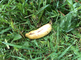

In [2]:
img = Image.open("mini-dataset/b01.png")
img

The fruit is located at the center and there is a lot of "useless" background around. To simplify the problem and run the code faster, we will keep only the 32x32 pixels in the center of the original image. This operation is called *cropping*.

1. Assign the dimension of the original image to two variables `width` and `height` , and check their values.<br>
    Hint: try `a,b = (14, 42)`, and look at the values of `a` and `b` after.

In [25]:
### BEGIN SOLUTION
width, height = img.size
### END SOLUTION

In [26]:
width

81

In [27]:
height

60

In [28]:
### HIDDEN TEST
assert width == 81
assert height == 60
### HIDDEN TEST

2.  Extract the 32x32 pixels from the center of the image, and assign the result in `cropped_img`.<br>
    Hints:
    - find, on paper, the *bounding box* of the region to be cropped; that is its minimal and maximal `x` and `y` coordinates;
    - look at the documentation of `round`;
    - look at the documentation of `img.crop`.

In [30]:
crop_size = 32
### BEGIN SOLUTION
left = round((width - crop_size)/2.)
top = round((height - crop_size)/2.)
right = round((width + crop_size)/2.)
bottom = round((height + crop_size)/2.)
    
cropped_img = img.crop((left, top, right, bottom))
### END SOLUTION

Display the cropped image, and double check its size:

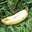

In [33]:
### BEGIN SOLUTION
cropped_img
### END SOLUTION

In [34]:
assert cropped_img.size == (32, 32)

3.  We will want to reuse the above code on all images. To this end, make it into a function:

In [4]:
def crop_image(img, crop_size = 32):
    ''' Extract the `crop_size` x `crop_size` pixels from the center of the PIL image `img`.'''
    ### BEGIN SOLUTION
    # First determine the bounding box
    width, height = img.size
    left = round((width - crop_size)/2.)
    top = round((height - crop_size)/2.)
    right = round((width + crop_size)/2.)
    bottom = round((height + crop_size)/2.)
    # Then crop the image to that box
    cropped_img = img.crop((left, top, right, bottom))
    ### END SOLUTION
    return cropped_img

Double check your function:

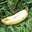

In [39]:
crop_image(img)

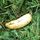

In [43]:
crop_image(img, 40)

In [44]:
assert crop_image(img).size == (32, 32)
assert crop_image(img, 40).size == (40, 40)

Open the file `code/my_utilities.py`, and copy your function there for reuse in other worksheets.

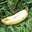

In [5]:
from my_utilities import crop_image
crop_image(img)

Let's apply the function to all apples and bananas:

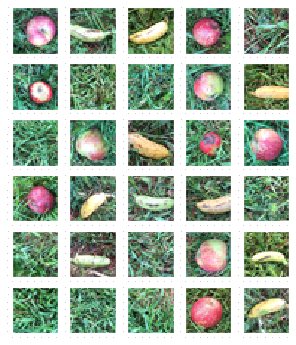

In [46]:
data_dir = './mini-dataset'
images = get_images(data_dir, '*.png')
show_images([crop_image(img) for img in images])